# Calcul parallel

JULIA dans sa grande force permet nativement le calcul parallel plus précisément calcul parallel à mémoire partagée ou distribuée.

En tout premier lieu on peut lancer une instance de JULIA avec plusieurs processeurs à l'aide de la commande

julia -p 4

Autrement on peut à la volée ajouter des processeurs ou plutôt workers

In [4]:
workers()

1-element Array{Int64,1}:
 1

In [5]:
addprocs(3)

3-element Array{Any,1}:
 2
 3
 4

In [6]:
workers()

3-element Array{Int64,1}:
 2
 3
 4

Plaçons nous sur un exemple de calcul de bassin d'attraction de Newton 

In [22]:
# algorithme de Newton
function newton(x0,f,df,epsi)
    k=0;
    x=x0;
    xnew=x-df(x)\f(x);
    while (norm(x-xnew)>epsi)&(k<1000)
        x=xnew
        xnew=x-df(x)\f(x);
    end
    return xnew
end
# fonction f(x)=0 à résoudre ici z=x+iy et f(z)=z^3-1
f(x)=[x[1]^3-3*x[1]*x[2]^2-1,3*x[1]^2*x[2]-x[2]^3]
# le jacobien de f
df(x)=[3*x[1]^2-3*x[2]^2 -6*x[1]*x[2];6*x[1]*x[2] 3*x[1]^2-3*x[2]^2]
# Calcul du bassin si on converge vers la Ieme racine suivant le point de départ
function calc_bassin(f,df,n)
    x=linspace(-1,1,n);
    y=linspace(-1,1,n);
    Imag=zeros(n,n);
    for i=1:n
        for j=1:n
            r=newton([x[i],y[j]],f,df,1e-10)
            if (norm(r-[1,0])<1e-2)
                Imag[i,j]=1;
            elseif (norm(r-[cos(2*pi/3),sin(2*pi/3)])<1e-2)
                Imag[i,j]=2;
            elseif (norm(r-[cos(2*pi/3),-sin(2*pi/3)])<1e-2)
                Imag[i,j]=3;
            end
        end
    end
    return Imag
end

calc_bassin (generic function with 1 method)

In [23]:
using PyPlot

In [24]:
n=1024
@time Imag=calc_bassin(f,df,n);

elapsed time: 25.678114987 seconds (10847384396 bytes allocated, 31.56% gc time)


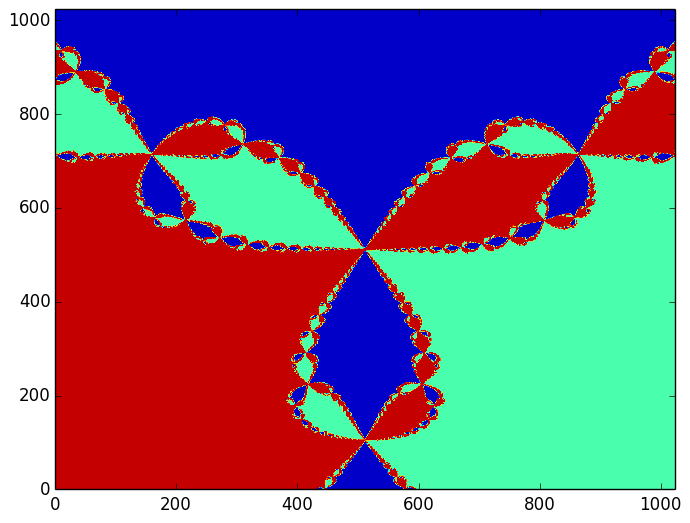

PyObject <matplotlib.contour.QuadContourSet instance at 0x119d8fc20>

In [25]:
contourf(Imag)